In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
titanic.shape

(891, 15)

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

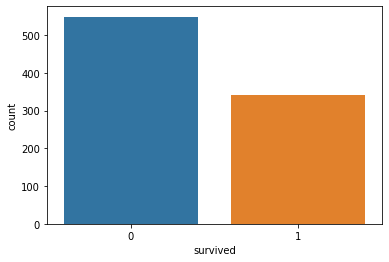

In [8]:
sns.countplot(titanic['survived'],label="Count")

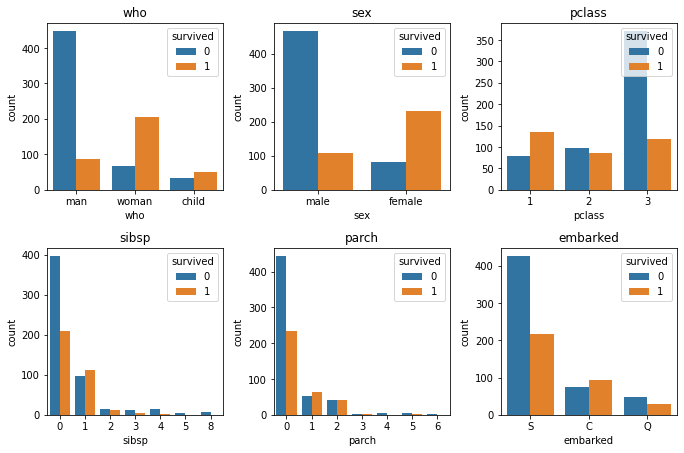

In [9]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c      
        ax = axs[r][c] 
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout() 

In [10]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [11]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='sex'>

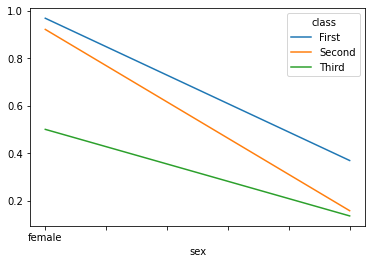

In [12]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

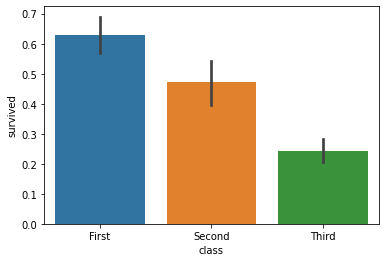

In [13]:
sns.barplot(x='class', y='survived', data=titanic)

In [14]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [15]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
for val in titanic:
   print(titanic[val].value_counts())
   print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)
titanic = titanic.dropna(subset =['embarked', 'age'])

In [18]:
titanic.shape

(712, 8)

In [19]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [22]:
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
def models(X_train,Y_train):
  

  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [26]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


In [28]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111 !"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832 !"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902 !"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972 !"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482 !"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763 !"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042 !"



In [29]:
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<AxesSubplot:xlabel='feature'>

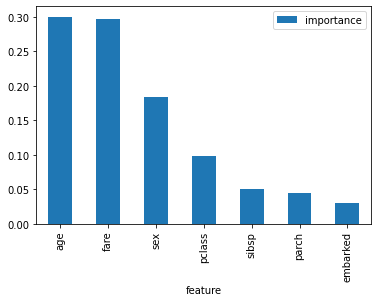

In [30]:
importances.plot.bar()

In [31]:
pred = model[6].predict(X_test)
print(pred)
print()
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [42]:
my_survival = [[3,1,21,0, 0, 0, 1]]
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
    print('Oh no! You didn\'t make it')
else:
    print('Nice! You survived')

[0]
Oh no! You didn't make it
